In [195]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [169]:
plt.style.use('fivethirtyeight')

In [170]:
df = pd.read_csv('data/properties_2016.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [171]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


## Data columns

In [172]:
print("No of Columns: {}".format(len(df.columns)))
[col for col in data.columns]

No of Columns: 58


['parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'firep

## Number of Rows

In [173]:
'{:,}'.format(len(df))

'2,985,217'

## Join with target variable

In [156]:
target = pd.read_csv('data/train_2016_v2.csv')

In [158]:
target.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [163]:
target.transactiondate = pd.to_datetime(target.transactiondate,format='%Y-%m-%d')

In [167]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [197]:
joined_data = pd.merge(target,df,on="parcelid",how="left")

In [198]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

## Split data into Train & Test datasets

This is useful, even during EDA, since we don't want to 'cheat'

In [199]:
train_data, test_data = train_test_split(joined_data, test_size=0.2, random_state = 42)

In [200]:
len(train_data), len(test_data)

(72220, 18055)

In [201]:
data = train_data.copy()

## Number of null values

In [202]:
null_vals = data.isnull().sum()
null_vals.sort_values(inplace=True,ascending=False)
[col+" : " + locale.format("%d", val, grouping=True) for col, val in zip(null_vals.index, null_vals)]

['buildingclasstypeid : 72,208',
 'finishedsquarefeet13 : 72,192',
 'basementsqft : 72,182',
 'storytypeid : 72,182',
 'yardbuildingsqft26 : 72,133',
 'fireplaceflag : 72,033',
 'architecturalstyletypeid : 71,997',
 'typeconstructiontypeid : 71,963',
 'finishedsquarefeet6 : 71,880',
 'decktypeid : 71,686',
 'poolsizesum : 71,450',
 'pooltypeid10 : 71,275',
 'pooltypeid2 : 71,261',
 'taxdelinquencyyear : 70,807',
 'taxdelinquencyflag : 70,807',
 'hashottuborspa : 70,316',
 'yardbuildingsqft17 : 70,085',
 'finishedsquarefeet15 : 69,350',
 'finishedsquarefeet50 : 66,686',
 'finishedfloor1squarefeet : 66,686',
 'fireplacecnt : 64,500',
 'threequarterbathnbr : 62,570',
 'pooltypeid7 : 58,845',
 'poolcnt : 57,886',
 'numberofstories : 55,742',
 'airconditioningtypeid : 49,239',
 'garagecarcnt : 48,213',
 'garagetotalsqft : 48,213',
 'regionidneighborhood : 43,366',
 'heatingorsystemtypeid : 27,403',
 'buildingqualitytypeid : 26,375',
 'propertyzoningdesc : 25,610',
 'unitcnt : 25,580',
 'lot

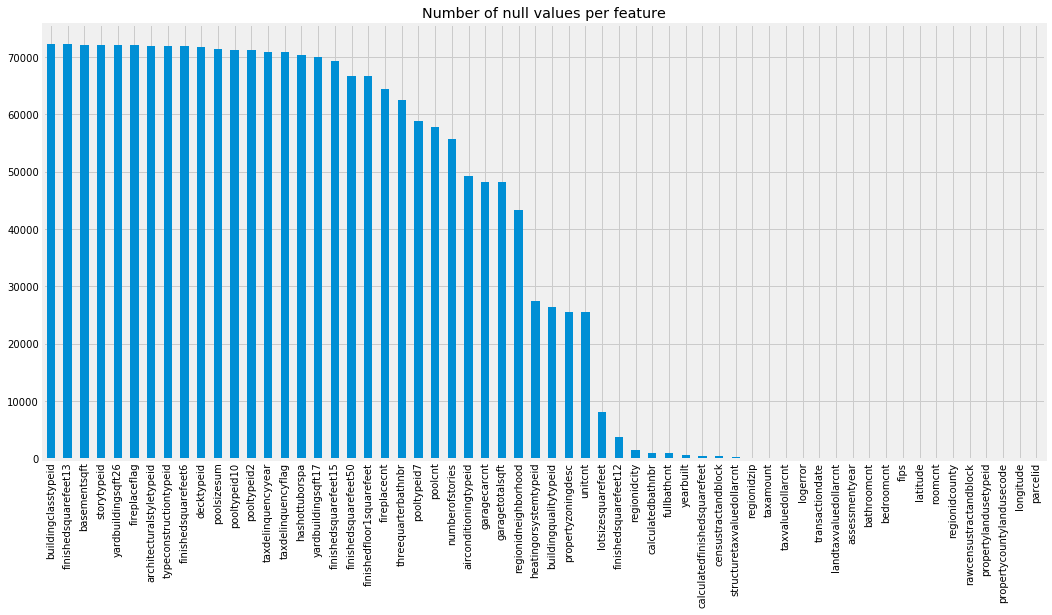

In [203]:
null_vals.plot(kind='bar',figsize=(16,8), title="Number of null values per feature")

## Data Types

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72220 entries, 89031 to 15795
Data columns (total 60 columns):
parcelid                        72220 non-null int64
logerror                        72220 non-null float64
transactiondate                 72220 non-null datetime64[ns]
airconditioningtypeid           22981 non-null float64
architecturalstyletypeid        223 non-null float64
basementsqft                    38 non-null float64
bathroomcnt                     72220 non-null float64
bedroomcnt                      72220 non-null float64
buildingclasstypeid             12 non-null float64
buildingqualitytypeid           45845 non-null float64
calculatedbathnbr               71292 non-null float64
decktypeid                      534 non-null float64
finishedfloor1squarefeet        5534 non-null float64
calculatedfinishedsquarefeet    71699 non-null float64
finishedsquarefeet12            68461 non-null float64
finishedsquarefeet13            28 non-null float64
finishedsquarefe

## Exploring data dictionary

In [205]:
workbook = pd.ExcelFile('data/zillow_data_dictionary.xlsx')

In [206]:
workbook.sheet_names

['Data Dictionary',
 'HeatingOrSystemTypeID',
 'PropertyLandUseTypeID',
 'StoryTypeID',
 'AirConditioningTypeID',
 'ArchitecturalStyleTypeID',
 'TypeConstructionTypeID',
 'BuildingClassTypeID']

In [207]:
data_dictionary = pd.read_excel('data/zillow_data_dictionary.xlsx')

In [208]:
sheet_features = {val:val.lower() for val in workbook.sheet_names[1:]}
sheet_features

{'AirConditioningTypeID': 'airconditioningtypeid',
 'ArchitecturalStyleTypeID': 'architecturalstyletypeid',
 'BuildingClassTypeID': 'buildingclasstypeid',
 'HeatingOrSystemTypeID': 'heatingorsystemtypeid',
 'PropertyLandUseTypeID': 'propertylandusetypeid',
 'StoryTypeID': 'storytypeid',
 'TypeConstructionTypeID': 'typeconstructiontypeid'}

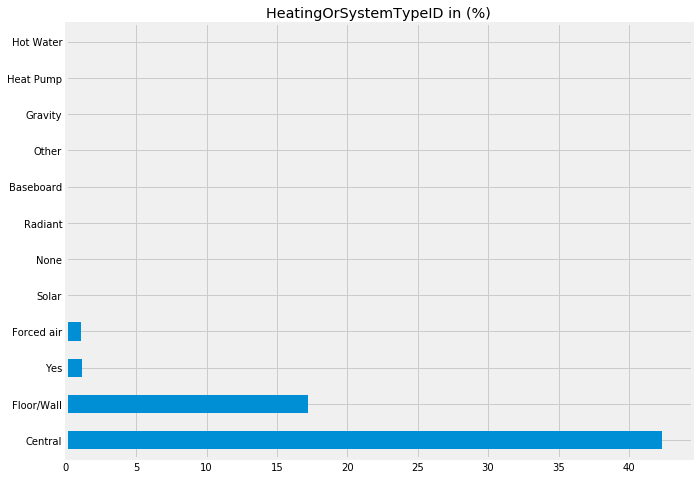

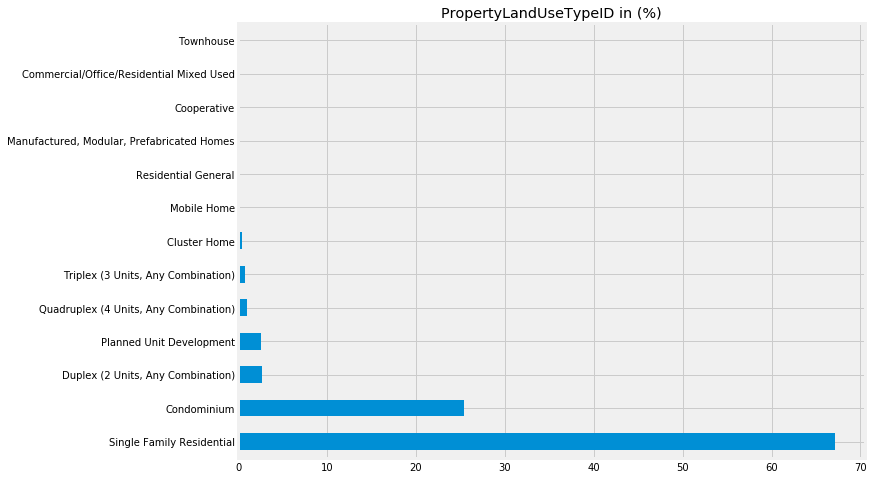

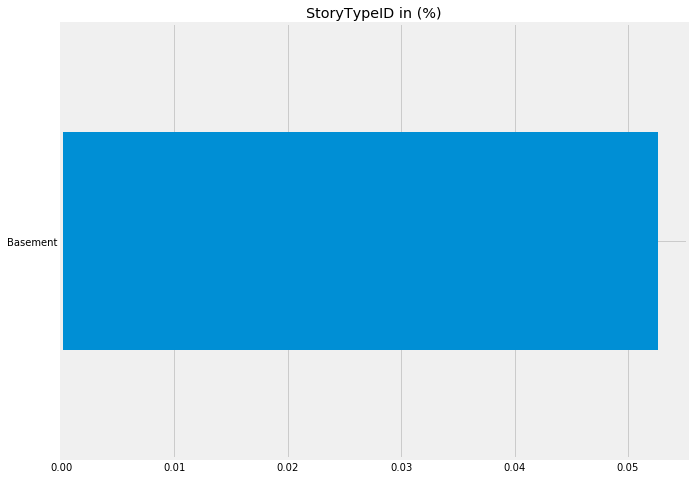

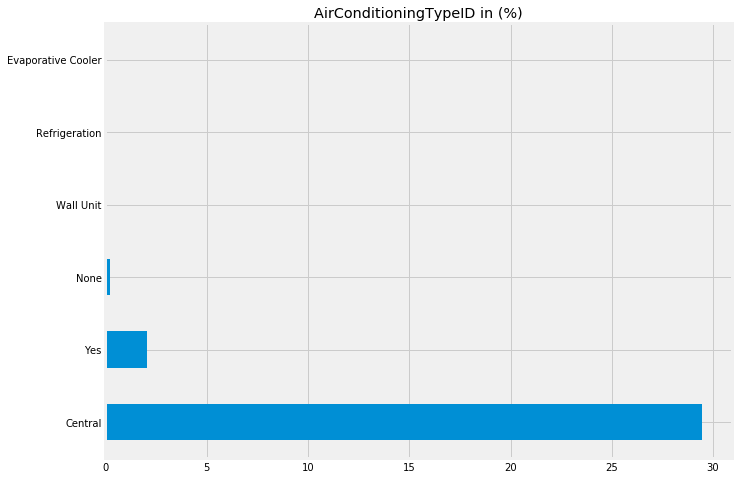

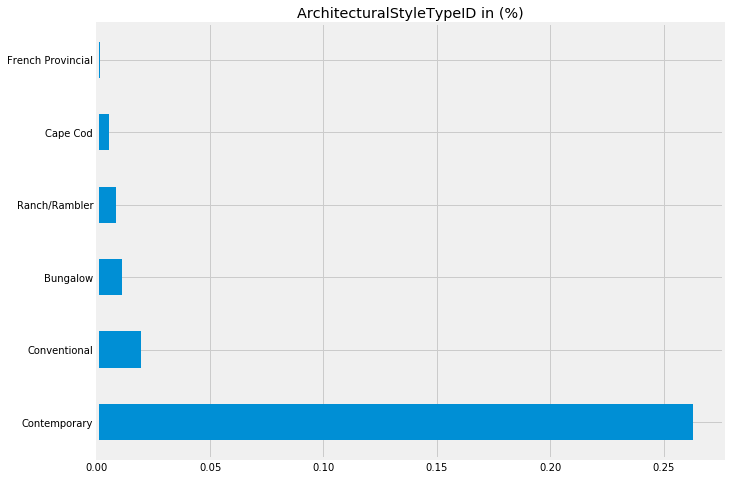

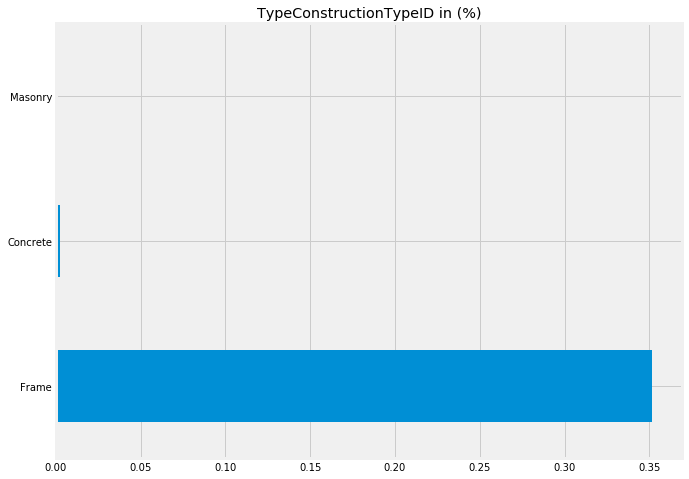

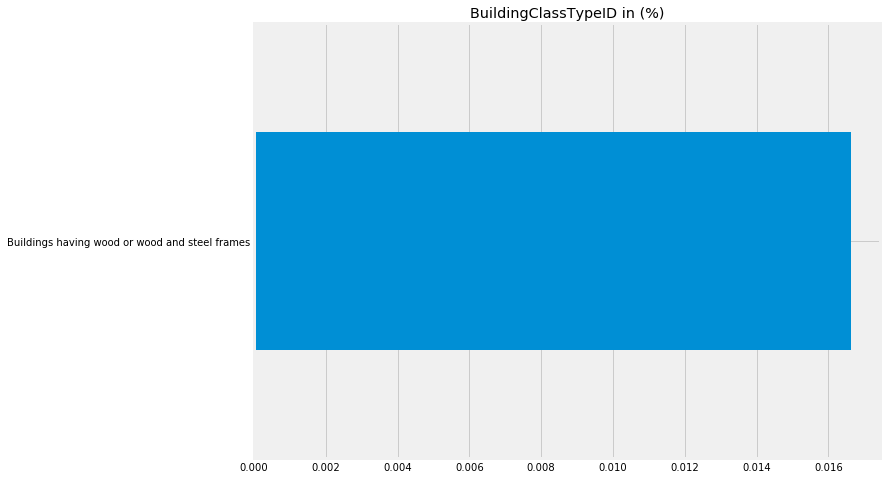

In [209]:
def look_up(num, sheet):
    return sheet[sheet[sheet.columns[0]] == num][sheet.columns[1]].values[0]
    
    
for sheet_name, sheet_feature in sheet_features.items():
    val_counts = data[sheet_feature].value_counts()/len(data) * 100
    sheet_data = pd.read_excel('data/zillow_data_dictionary.xlsx',sheetname=sheet_name)
    val_counts.index = [look_up(int(val), sheet_data) for val in val_counts.index]
    val_counts.plot(kind='barh',title=sheet_name + ' in (%)', figsize=(10,8))
    plt.show()

## Geographical distribution

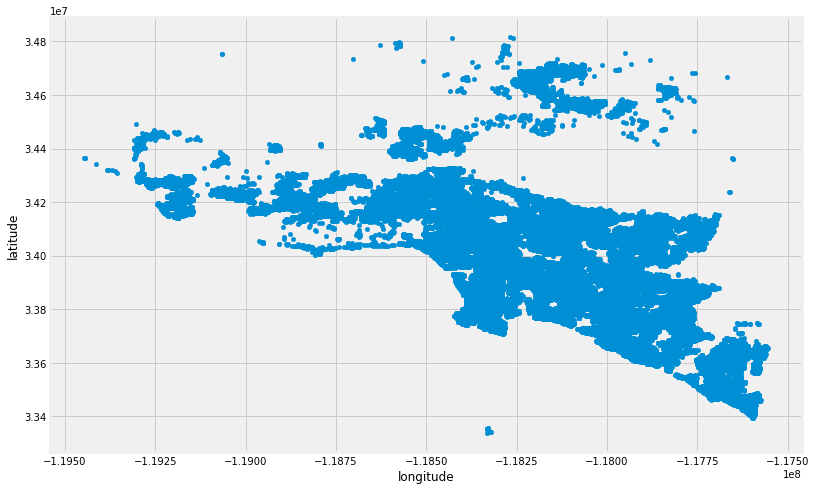

In [211]:
data.plot(kind='scatter', x='longitude',y='latitude', figsize=(12,8))